<a href="https://colab.research.google.com/github/AdeelAhmed2001/deep-learning-assignments/blob/main/flower_recognizatio_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pathlib
import cv2
directory = pathlib.Path(r"/content/drive/MyDrive/archive/flowers")
flowers = []
features = []
labels = []
# Iterating Over Directory To Extract Sub Directories
for dir in directory.iterdir():
  flowers.append(dir.name)
  print(dir.name)
# Iterating Over Sub Directories To Extract Lables
  for imgpath in dir.iterdir():
    if imgpath.name.endswith("jpg"):
      labels.append(dir.name)
      #imgarr = cv2.imread(str(imgpath), cv2.IMREAD_GRAYSCALE)
      imgarr = cv2.resize(imgarr,(800,800))
      features.append(imgarr)

tulip
flowers
sunflower
dandelion
rose
daisy


In [4]:
imgarr.shape

(800, 800)

In [5]:
print(imgarr)

[[124 124 124 ...  74  79  80]
 [124 124 124 ...  74  79  80]
 [123 123 123 ...  74  79  80]
 ...
 [ 10   9   8 ... 100 101 102]
 [ 10   9   7 ... 100 101 101]
 [ 10   9   7 ... 100 101 101]]


In [6]:
len(imgarr)

800

In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [29]:

imgarr.ravel()

array([124, 124, 124, ..., 100, 101, 101], dtype=uint8)

In [30]:
x=imgarr[:,0:-1]
y=imgarr[:,-1]

In [31]:
from sklearn.model_selection import train_test_split
train_img,test_img,train_labels,test_labels=train_test_split(x,y,test_size=0.40,random_state=1) 

In [32]:
train_img.shape

(480, 799)

In [33]:
len(train_labels)

480

In [34]:
test_img.shape

(320, 799)

In [35]:
len(test_labels)

320

In [36]:
train_img[5]

array([115, 114, 110, 106, 100,  93,  85,  75,  65,  57,  49,  42,  39,
        35,  31,  27,  24,  18,  12,   9,   7,   6,   6,   6,   6,   6,
         6,   6,   6,   5,   5,   5,   4,   4,   3,   3,   3,   3,   3,
         4,   4,   5,   4,   4,   5,   6,   6,   4,   2,   4,   6,   9,
        12,  15,  18,  21,  22,  19,  16,  14,  12,  10,   8,   7,   8,
        10,  12,  11,  11,  10,   8,   8,   9,   9,  11,  13,  16,  19,
        23,  26,  30,  33,  37,  40,  44,  49,  53,  57,  60,  63,  65,
        66,  63,  60,  58,  55,  52,  52,  52,  51,  51,  50,  49,  47,
        46,  45,  43,  40,  37,  36,  37,  38,  42,  46,  52,  58,  65,
        74,  83,  90,  96, 102, 107, 112, 115, 119, 122, 125, 129, 133,
       137, 141, 144, 147, 148, 148, 149, 149, 149, 150, 150, 150, 147,
       145, 144, 144, 145, 148, 151, 153, 153, 153, 152, 151, 151, 152,
       153, 154, 155, 156, 157, 158, 155, 153, 150, 147, 141, 127, 112,
        96,  79,  66,  62,  58,  59,  61,  63,  64,  65,  68,  7

In [37]:
test_labels[8]

76

In [38]:
from keras.utils import to_categorical
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)


In [39]:
imgarr.ravel()

array([124, 124, 124, ..., 100, 101, 101], dtype=uint8)

In [47]:
network =models.Sequential()
network.add(layers.Dense(10,activation="relu",input_shape=(800,)))  #train_img.shape[1],
network.add(layers.Dense(8,activation='relu'))
network.add(layers.Dense(5,activation="softmax"))

In [45]:
network.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 

In [47]:
history=network.fit(train_img,train_labels,epochs=50)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


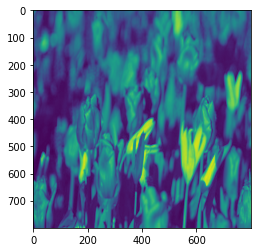

In [21]:
import matplotlib.pyplot as plt
print(train_labels[1])
plt.imshow(imgarr)